In [1]:
import distl
import numpy as np

# Multivariate Gaussian

First we'll create a [multivariate gaussian](../api/MVGaussian.md) distribution by providing the means and covariances of three parameters.

In [2]:
mvg = distl.mvgaussian([5,10, 12], 
                       np.array([[ 2,  1, -1], 
                                 [ 1,  2,  1], 
                                 [-1,  1,  2]]),
                       allow_singular=True,
                       labels=['a', 'b', 'c'])

In [3]:
mvg.sample()

array([ 3.66733696,  9.49554383, 12.82820687])

In [4]:
mvg.sample(size=5)

array([[ 5.66502868,  9.52783319, 10.86280451],
       [ 4.61064011,  8.7759355 , 11.16529539],
       [ 7.12024853, 10.25674793, 10.1364994 ],
       [ 6.44257534, 11.4805017 , 12.03792635],
       [ 3.10842163,  9.40966115, 13.30123952]])

and plotting will now show a corner plot (if [corner](https://corner.readthedocs.io/en/latest/) is installed)

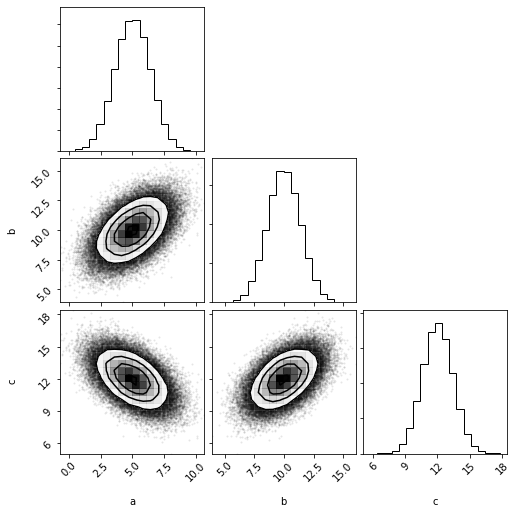

In [5]:
fig = mvg.plot(show=True)

# Multivariate Histogram

we can now convert this multivariate gaussian distribution into a [multivariate histogram](../api/MVHistogram.md) distribution (alternatively we could create a histogram directly from a set of samples or chains via [mvhistogram_from_data](../api/distl.mvhistogram_from_data.md).

In [6]:
mvh = mvg.to_mvhistogram(bins=15)

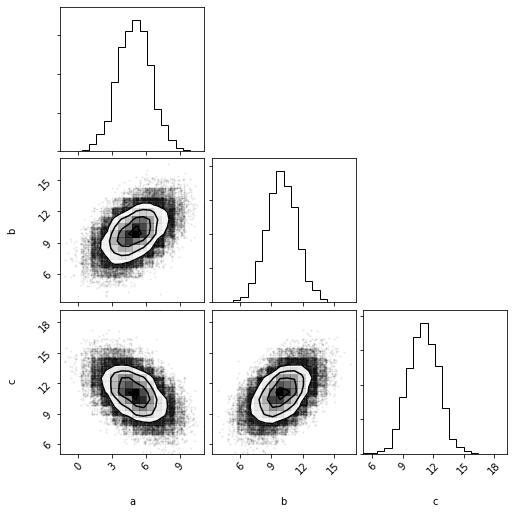

In [7]:
fig = mvh.plot(show=True, size=1e6)

In [8]:
np.asarray(mvh.density.shape)

array([15, 15, 15])

Now if we access the means and covariances, we'll see that they are slightly different due to the binning.

In [9]:
mvh.calculate_means()

array([ 4.96359056,  9.95932656, 11.01490374])

In [10]:
mvh.calculate_covariances()

array([[ 2.14105946,  0.98105416, -1.00963675],
       [ 0.98105416,  2.13073206,  0.99596704],
       [-1.00963675,  0.99596704,  2.15181395]])

If we convert back to a multivariate gaussian, these are the means and covariances that will be adopted (technically not exactly as they'll be recomputed from another sampling of the underlying distribution).

In [11]:
mvhg = mvh.to_mvgaussian()

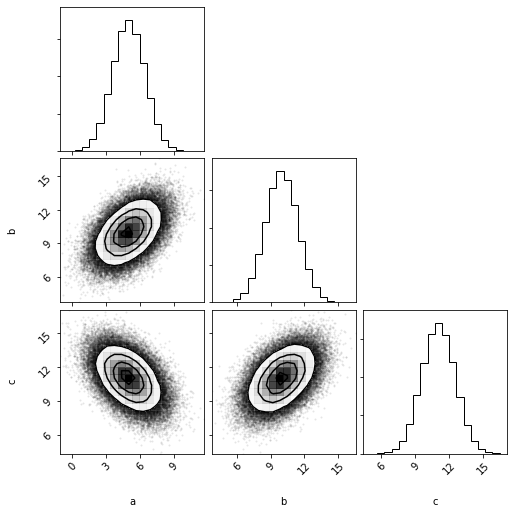

In [12]:
fig = mvhg.plot(show=True)

In [13]:
mvhg.mean

array([ 4.97551242,  9.96853692, 11.01452125])

In [14]:
mvhg.cov

array([[ 2.12781467,  0.98984197, -0.99579334],
       [ 0.98984197,  2.14319868,  0.99486197],
       [-0.99579334,  0.99486197,  2.14530558]])

# Take Dimensions

In [15]:
mvg_ac = mvg.take_dimensions(['a', 'c'])

In [16]:
mvg_ac.sample()

array([ 6.61343546, 10.6356529 ])

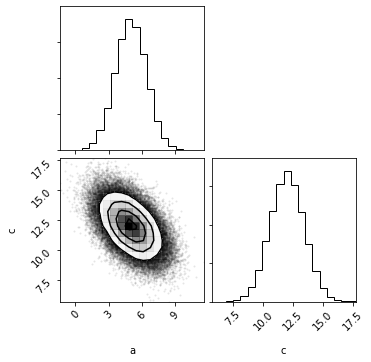

In [17]:
out = mvg_ac.plot(show=True)

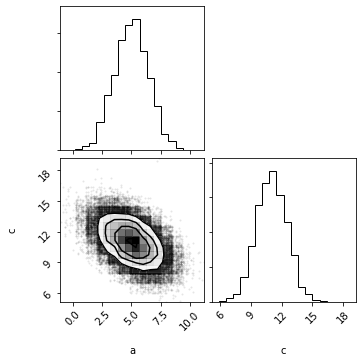

In [18]:
out = mvh.take_dimensions(['a', 'c']).plot(show=True)

## Passing a single dimension to take_dimension

If you pass a single-dimension to take_dimension, then the univariate version of the same type is returned instead.  See the "Converting to Univariate" section below for examples directly calling [to_univariate](../api/BaseMultivariateDistribution.to_univariate.md).

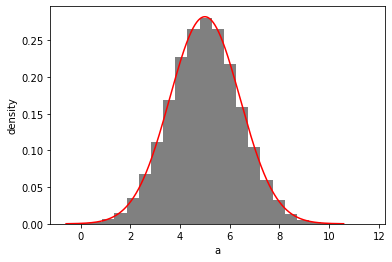

In [19]:
out = mvg.take_dimensions(['a']).plot(show=True)

# Slicing

Slicing allows taking a single dimension while retaining all underlying covariances such that the resulting distribution can undergo [math operations](./math.ipynb), [and/or logic](./and_or.ipynb), and included in [distribution collections](./collections.ipynb).  For more details, see the [slice examples](./slice.ipynb).

In [20]:
mvg_a = mvg.slice('a')

In [21]:
mvg_a.sample()

6.642219632841687

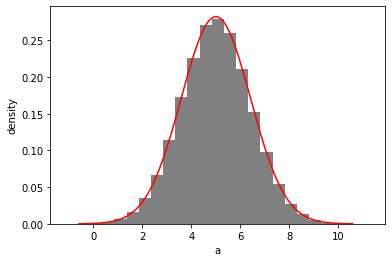

In [22]:
out = mvg_a.plot(show=True)

In [23]:
mvg_a.multivariate

<distl.mvgaussian mean=[5, 10, 12] cov=[[ 2  1 -1]
 [ 1  2  1]
 [-1  1  2]] allow_singular=True labels=['a', 'b', 'c']>

# Converting to Univariate

There are methods to convert directly to the univariate distribution of the same type as the univariate:

* [Multivariate.to_univariate](../api/BaseMultivariateDistribution.to_univariate.md).
* [MultivariateSlice.to_univariate](../api/BaseMultivariateSliceDistribution.to_univariate.md).

When acting on a Multivariate, the requested dimension must be passed.

In [24]:
mvg.to_univariate(dimension='a')

<distl.gaussian loc=5.0 scale=1.4142135623730951 label=a>

Whereas a MultivariateSlice converts using the sliced dimension

In [25]:
mvg_a.to_univariate()

<distl.gaussian loc=5.0 scale=1.4142135623730951 label=a>